In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [250]:
df_index = pd.read_csv("economic_index.csv")

In [251]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [252]:
df_index.drop(columns=["year", "month"], axis = 1, inplace=True)

In [253]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [254]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

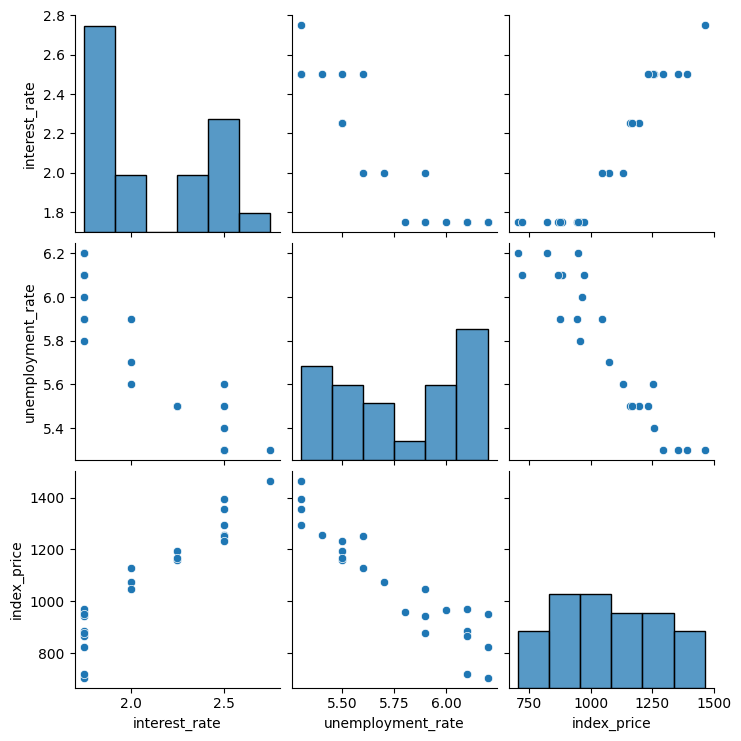

In [255]:
# Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [256]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.917603,0.935793
unemployment_rate,-0.917603,1.000000,-0.934615
index_price,0.935793,-0.934615,1.000000


Text(0, 0.5, 'unemployment rate')

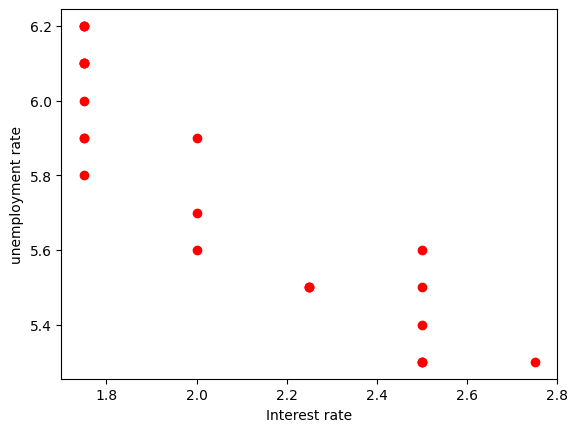

In [257]:
# Visualize hte datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [258]:
# independent and dependent features
X = df_index.iloc[:,:-1]
Y = df_index.iloc[:, -1]

In [259]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [260]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=42)

In [261]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

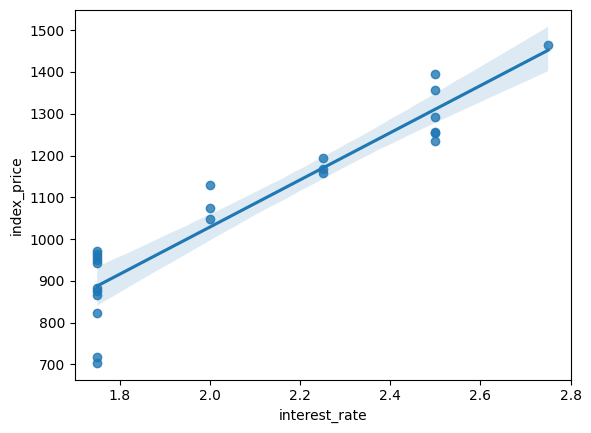

In [262]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

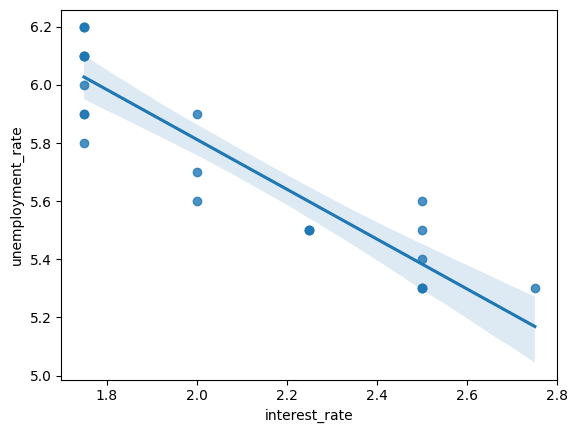

In [263]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

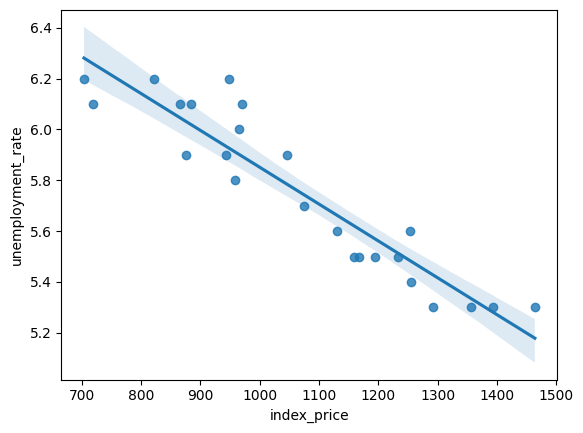

In [264]:
sns.regplot(x = df_index['index_price'], y = df_index['unemployment_rate'])

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [267]:
X_train

array([[-0.90115511,  0.72199487],
       [ 1.31077107, -1.44398974],
       [-0.90115511,  1.34084762],
       [ 1.31077107, -0.51571062],
       [ 1.31077107, -1.44398974],
       [-0.16384638,  0.4125685 ],
       [-0.90115511,  0.10314212],
       [ 1.31077107, -1.44398974],
       [ 1.31077107, -1.13456337],
       [-0.90115511,  1.34084762],
       [-0.90115511,  1.34084762],
       [-0.90115511,  0.4125685 ],
       [-0.90115511,  1.03142125],
       [ 0.57346234, -0.825137  ],
       [-0.16384638, -0.51571062],
       [-0.90115511,  0.4125685 ],
       [-0.90115511,  1.03142125],
       [ 1.31077107, -0.825137  ]])

In [268]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [269]:
regression.fit(X_train, Y_train)

LinearRegression()

In [270]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(
    regression, 
    X_train, 
    Y_train, 
    scoring='neg_mean_squared_error',
    cv = 3
)

In [271]:
np.mean(validation_score)

np.float64(-5616.258298705005)

In [272]:
# prediction
Y_pred = regression.predict(X_test)

In [273]:
Y_pred

array([1163.43306944,  802.9392359 , 1365.00557008,  802.9392359 ,
       1022.9164859 , 1163.43306944])

In [274]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7893.372100264943
68.03324537054577
88.84465150061057


In [275]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, Y_pred)
print(score)

# display adjusted R-square
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.76552947402029
0.6092157900338167


### Assumptions

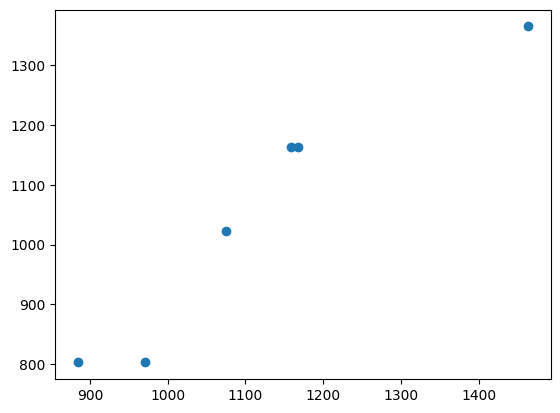

In [276]:
plt.scatter(Y_test, Y_pred)

In [277]:
residuals = Y_test - Y_pred
print(residuals)

8      -4.433069
16    168.060764
0      98.994430
18     81.060764
11     52.083514
9       3.566931
Name: index_price, dtype: float64


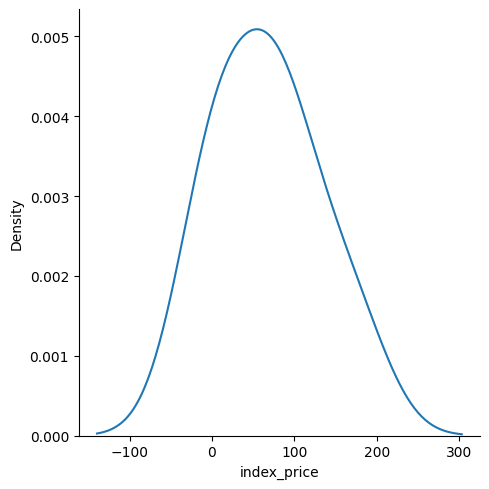

In [278]:
# Plot this residuals
sns.displot(residuals, kind = 'kde')

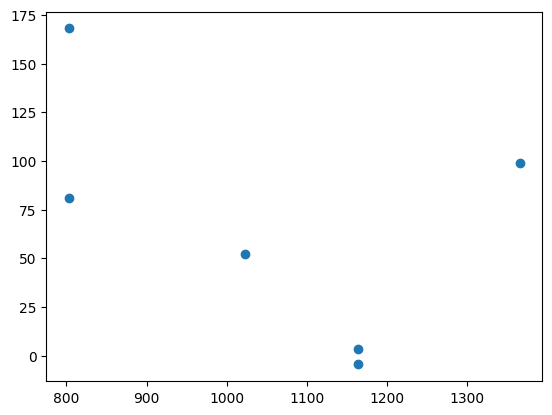

In [279]:
# scatter plot with respect to predictions and residuals
plt.scatter(Y_pred, residuals)

In [280]:
# OLS Linear Regression
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train).fit()

In [281]:
model.summary()

c:\Users\ukudi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2911
Date:                Sun, 23 Mar 2025   Prob (F-statistic):                       0.751
Time:                        11:41:29   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            84.5281    630.826      0.134      0.895   -1252.763    1421.819
x2          -121.3782    630.826     -0.192      0.850   -1458.669    1215.913
==============================================================================
Omnibus:                        0.789   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.116
Skew:                          -0.183   Prob(JB):                        0.944
Kurtosis:                       3.142   Cond. No.                         4.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
print(regression.coef_)

[  84.52808964 -121.37817294]
